# 로지스틱 회귀

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## 선형회귀분석 오류
* 곤충질량(g)에 따라 암수구분하는 모델 생성
* 0:암컷, 1:수컷

In [1]:
wght = [1.94,1.67,0.92,1.11,1.41,1.65,2.28,0.47,1.07,2.19,2.08,1.02,0.91,1.16,1.46,1.02,0.85,0.89,1.79,1.89,0.75,0.9,1.87,0.5,0.69,1.5,0.96,0.53,1.21,0.6]
spcs = [1,1,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0]

### 시각화

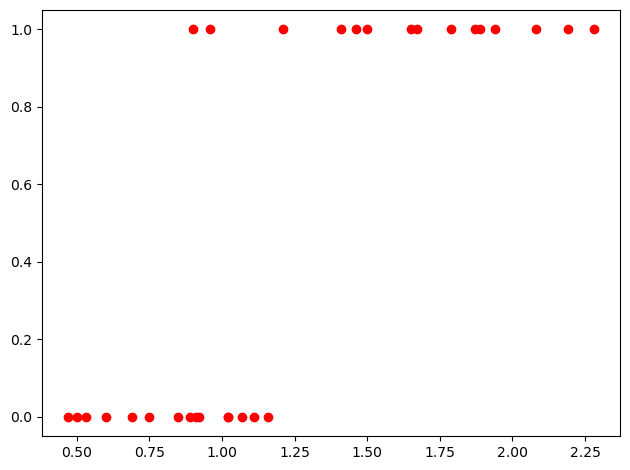

In [5]:
plt.plot(wght, spcs, 'ro')
plt.tight_layout()

### 선형회귀 분석

In [8]:
# 모델 학습
# fit(독립변수, 종속변수)
lr = LinearRegression()
wght2 = np.array(wght).reshape(-1, 1)  # 배열 구조 변경
lr.fit(wght2, spcs)

LinearRegression()

In [10]:
# 회귀계수 확인
# 기울기, 절편
lr.coef_, lr.intercept_

(array([0.74825276]), -0.43007818056050295)

In [11]:
# 예측 평가
# 예측값 = predict(독립변수)
# r2_score(실제값, 예측값)
pred = lr.predict(wght2)
r2_score(spcs, pred)

0.6140660982944375

### 분석결과 시각화

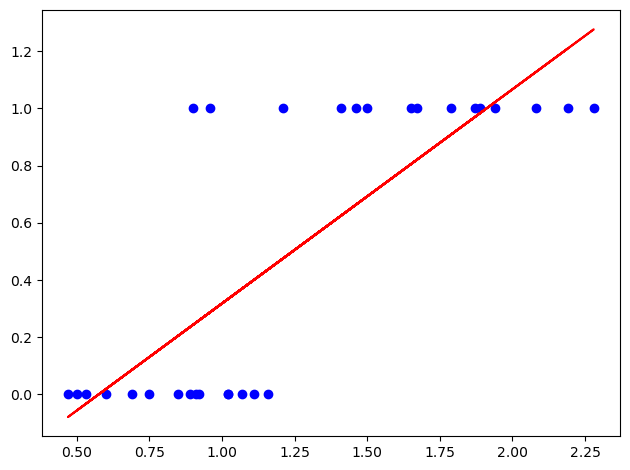

In [13]:
plt.plot(wght, spcs, 'bo')
plt.plot(wght, pred, 'r-')
plt.tight_layout()

## 종속변수가 범주형인 경우
* 선형방정식은 이항분포를 따르는 데이터에 적용하기에 다소 맞지 않음
   + $ y = ax + b $
* 즉, 우변값의 범위는 '-무한대~+무한대'이지만, 좌변값의 범위는 '0~1'임
* 따라서, 좌변값의 범위를 우변과 동일하게 '-무한대~+무한대'로
  하려면 적절한 변환함수가 필요
    + 로짓함수를 이용해서 변환함
    + ### $  f(x) = \frac {1} {1 + e^{-x}} $

### 로짓함수 정의

In [14]:
def logistic(x, w):
    yy = 1 / (1 + np.exp(-(w[0]*x + w[1])))
    return yy
# w는 가중치..

In [15]:
np.min(wght), np.max(wght)

(0.47, 2.28)

In [20]:
# 로짓함수를 이용해서 다시 그래프를 그림
W = [8, -10]  # 기울기와 절편을 임의로 설정
xx = np.linspace(0.45, 2.30, 50)
yy = logistic(xx, W)
xx, yy

(array([0.45      , 0.4877551 , 0.5255102 , 0.56326531, 0.60102041,
        0.63877551, 0.67653061, 0.71428571, 0.75204082, 0.78979592,
        0.82755102, 0.86530612, 0.90306122, 0.94081633, 0.97857143,
        1.01632653, 1.05408163, 1.09183673, 1.12959184, 1.16734694,
        1.20510204, 1.24285714, 1.28061224, 1.31836735, 1.35612245,
        1.39387755, 1.43163265, 1.46938776, 1.50714286, 1.54489796,
        1.58265306, 1.62040816, 1.65816327, 1.69591837, 1.73367347,
        1.77142857, 1.80918367, 1.84693878, 1.88469388, 1.92244898,
        1.96020408, 1.99795918, 2.03571429, 2.07346939, 2.11122449,
        2.14897959, 2.18673469, 2.2244898 , 2.2622449 , 2.3       ]),
 array([0.0016588 , 0.00224241, 0.00303072, 0.00409503, 0.00553102,
        0.00746679, 0.01007317, 0.01357692, 0.01827686, 0.02456328,
        0.03293939, 0.04404281, 0.05866199, 0.07773913, 0.10234571,
        0.13361258, 0.17259494, 0.22006183, 0.2762249 , 0.3404646 ,
        0.41115719, 0.48571817, 0.56092032, 0.

### 분석 시각화

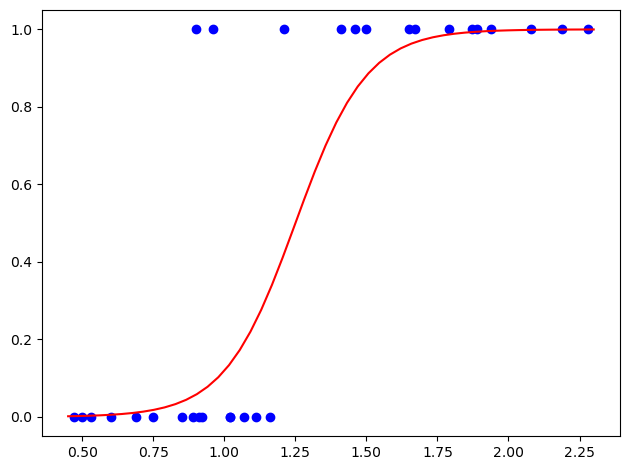

In [23]:
plt.plot(wght, spcs, 'bo')
plt.plot(xx, yy, 'r-')
plt.tight_layout()

### 결정경계 시각화

In [32]:
# yy가 0.5이상이 되는 지점을 알아냄
idx = np.min(np.where(yy >= 0.5))
idx, yy[idx], xx[idx]

(22, 0.5609203189794597, 1.280612244897959)

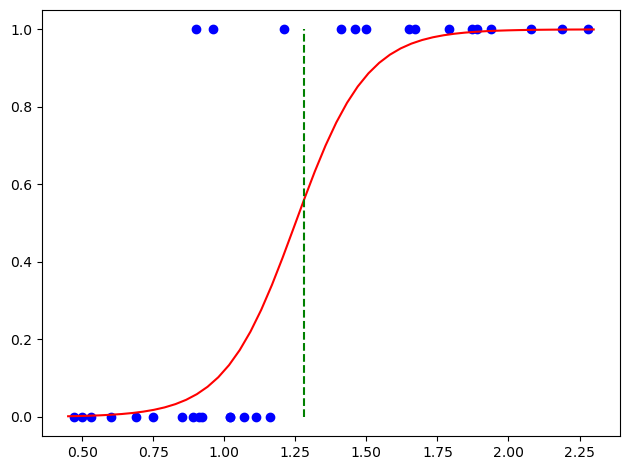

In [34]:
xp = xx[idx]

plt.plot(wght, spcs, 'bo')
plt.plot(xx, yy, 'r-')
plt.plot([xp, xp], [0, 1], 'g--')
plt.tight_layout()

### 타이타닉 승선객의 나이에 따른 생존여부 분석

In [36]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S


In [38]:
data = titanic.loc[:, ['age','survived']]
data.head()

,age,survived
0,29.0000,1.0
1,0.9167,1.0
2,2.0000,0.0
3,30.0000,0.0
4,25.0000,0.0


In [40]:
data.isna().sum()

age         264
survived      1
dtype: int64

In [41]:
data.dropna(inplace=True)

In [42]:
# 데이터 사라진 걸 확인할 수 있음
data.isna().sum()

age         0
survived    0
dtype: int64

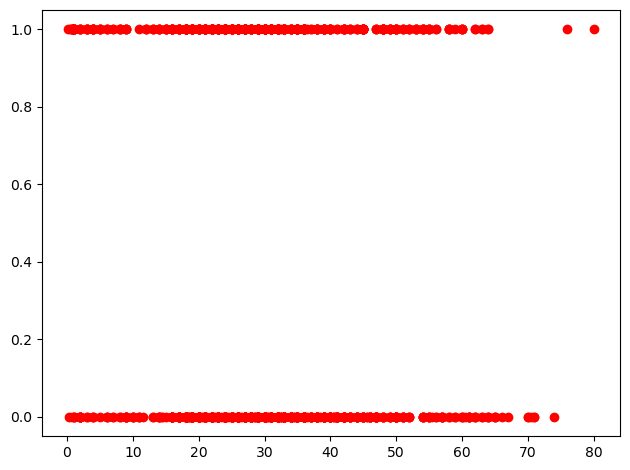

In [43]:
plt.plot(data.age, data.survived, 'ro')
plt.tight_layout()

In [48]:
# 로짓함수를 이용해서 다시 그래프를 그림
W = [1, -37]  # 기울기와 절편을 임의로 설정
xx = np.linspace(0, 80, 200)
yy = logistic(xx, W)

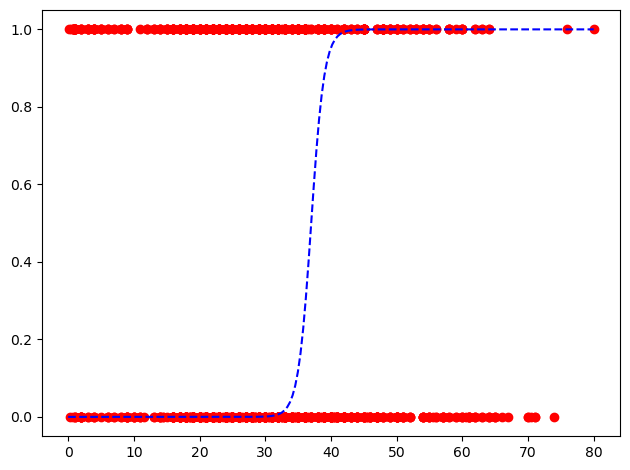

In [49]:
plt.plot(data.age, data.survived, 'ro')
plt.plot(xx, yy, 'b--')
plt.tight_layout()